<img style = "float: middle" src = "https://iteso.mx/documents/10448/19542899/logoiteso.png/f48e957e-4f61-4752-b06d-9aa45e6e8414?t=1594744730426" width = "400" >


# Proyecto Final

## <font color = darkgreen>  Portafolios de Inversión  </font>


### Integrantes del equipo:

- Michelle Toruño Orendain

  
- Fernando Zepeda Fernández

  
- Ricardo Rodriguez 



## 1. Elección de activos
---
El portafolio que decidimos contruir constara de 10 acciones y 5 ETF's. Las acciones que seleccionamos sobresalen dentro de los siguientes sectores: tecnológico, farmacéutico, de energía y comercial. La elección de las acciones está enfocada en conseguir rendimientos estables y buscar que activos con mayor riesgo nos puedan dar grandes rendimientos. Por otro lado, los ETF´S utilizados dentro de este portafolio van desde modelos arriegados y volátiles hasta modelos conservadores de inversión.
El objetivo principal de este proyecto es poder observar el crecimiento de diferentes activos que hoy en día sabemos la importancia que representan dentro del mercado financiero y ver como se comportan a través del tiempo.


|   | Activo   | Nombre                                            | Ticker  |
|---|:--------:|:--------------------------------------------------|:--------|
| 1 | ACCIÓN   | Tesla, Inc.                                       | TSLA    |
| 2 | ACCIÓN   | Microsoft  Corporation                            | MCD     |
| 3 | ACCIÓN   | Pfizer Inc.                                       | PFE     |
| 4 | ACCIÓN   | The Procter & Gamble Company                      | PG      |
| 5 | ACCIÓN   | Apple Inc.                                        | AAPL    |
| 6 | ACCIÓN   | Berkshire Hathaway Inc                            | BRK-B   |
| 7 | ACCIÓN   | Alphabet Inc.                                     | GOOG    |
| 8 | ACCIÓN   | Amazon.com, Inc                                   | AMZN    |
| 9 | ACCIÓN   | Target Corporation                                | TGT     |
| 10| ACCIÓN   | ConocoPhillips                                    | COP     |
| 11|  ETF     | Vanguard Information Technology Index Fund        | VGT     |
| 12|  ETF     | Global X Lithium & Battery Tech                   | LIT     |
| 13|  ETF     | SPDR Gold Shares                                  | GLD     |
| 14|  ETF     | Vanguard 500 Index Fund ETF                       | VOO     |
| 15|  ETF     | iShares MSCI USA Quality Factor ETF               | QUAL    |


## 2. Selección de portafolios

In [1]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import scipy.optimize as opt
from scipy.optimize import minimize

In [2]:
# Precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Funciones objetivo
def varianza(w, Sigma): 
    return w.T.dot(Sigma).dot(w)


In [4]:
def menos_RS (w, Eind, Sigma, rf):
    Ep = Eind.T.dot(w)
    sp = (w.T.dot(Sigma).dot(w))**0.5
    RS = (Ep - rf2016) / sp
    return -RS

In [5]:
# Vector de w
N = 101
w = np.linspace(0,1, N)

# Aversión al riesgo
g = 7

# Datos
names = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL']

In [6]:
cetes = pd.DataFrame(data = {'Año': ['2016','2017','2018','2019','2020','2021'],
        'tasa':[0.0305, 0.0582, 0.0725, 0.0806,0.0725,0.0428]
})
cetes

,Año,tasa
0,2016,0.0305
1,2017,0.0582
2,2018,0.0725
3,2019,0.0806
4,2020,0.0725
5,2021,0.0428


### 2.1 Portafolio 2016

In [ ]:
# 2016
start = '2010-01-01'
end = '2015-12-31'
rf2016 = cetes.iloc[0].loc['tasa']

# Datos
closes = get_adj_closes(tickers = names,
                        start_date = start,
                        end_date = end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data={'Media':252*ret.mean(),
                        'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

# Portafolio de mínima varianza
mv16 = minimize(fun = varianza,
                x0 = w0,
                args = (Sigma,),
                bounds = bnds,
                constraints = cons,
                tol = 1e-10)

w_minvar16 = mv16.x

E_minvar2016 = Eind.T.dot(w_minvar16)
s_minvar2016 = (w_minvar16.T.dot(Sigma).dot(w_minvar16))**0.5
RS_minvar2016 = (E_minvar2016 - rf2016) / s_minvar2016 

In [ ]:
# Portafolio EMV
EMV16 = minimize(fun = menos_RS,
               x0  = w0,
               args = (Eind, Sigma, rf2016),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV16 = EMV16.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2016 = Eind.T.dot(w_EMV16)
s_EMV2016 = (w_EMV16.T.dot(Sigma).dot(w_EMV16))**0.5
RS_EMV2016 = (E_EMV2016 - rf2016) / s_EMV2016

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV16.T.dot(Sigma).dot(w_minvar16)
# Correlación entre los portafolios
corr = cov / (s_EMV2016 * s_minvar2016)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                              'w_minvar': 1 - w,
                              'Media': w * E_EMV2016 + (1 - w) * E_minvar2016,
                              'Vol': ((w * s_EMV2016)**2 + ((1 - w) * s_minvar2016)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2016) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2016 + (1 - wp) * rf2016,
                         'Vol': wp * s_EMV2016})
LAC['RS'] = (LAC['Media'] - rf2016) / LAC['Vol']

### Gráfica 2016

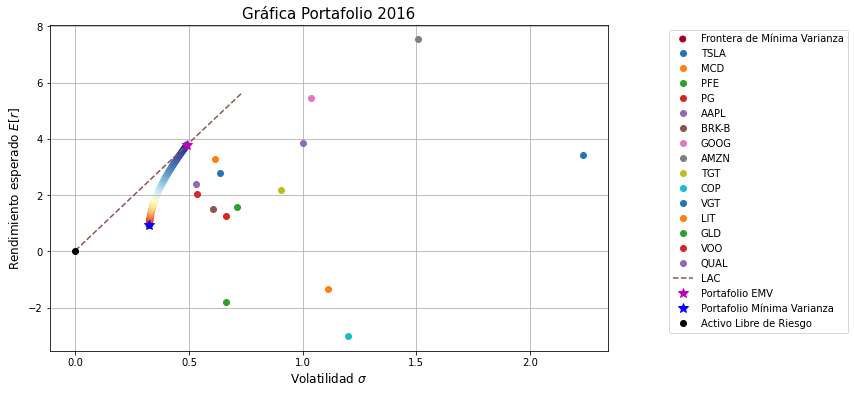

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c=frontera['RS'],
            cmap='RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])

plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2016, E_EMV2016, '*m', ms = 10, label = 'Portafolio EMV')
plt.plot(s_minvar2016, E_minvar2016, '*b', ms = 10, label = 'Portafolio Mínima Varianza')
plt.plot(0, rf2016, 'ok', label = 'Activo Libre de Riesgo')

plt.title('Gráfica Portafolio 2016', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.grid()

plt.savefig('plot2016.png', dpi = 300, bbox_inches = 'tight')

### 2.2 Portafolio 2017

In [ ]:
# 2017
start = '2012-01-01'
end = '2016-12-31'
rf2017 = cetes.iloc[1].loc['tasa']

# Datos
closes = get_adj_closes(tickers = names,
                        start_date = start,
                        end_date = end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data={'Media':252*ret.mean(),
                         'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [ ]:
# Portafolio de mínima varianza
minvar17 = minimize(fun=varianza,
                 x0=w0,
                 args=(Sigma,),
                 bounds=bnds,
                 constraints=cons,
                 tol=1e-10)

w_minvar17 = minvar17.x

E_minvar2017 = Eind.T.dot(w_minvar17)
s_minvar2017 = (w_minvar17.T.dot(Sigma).dot(w_minvar17))**0.5
RS_minvar2017 = (E_minvar2017 - rf2017) / s_minvar2017 

In [ ]:
# Portafolio EMV
EMV17 = minimize(fun= menos_RS,
               x0 = w0,
               args = (Eind, Sigma, rf2017),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV17 = EMV17.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2017 = Eind.T.dot(w_EMV17)
s_EMV2017 = (w_EMV17.T.dot(Sigma).dot(w_EMV17))**0.5
RS_EMV2017 = (E_EMV2017 - rf2017) / s_EMV2017

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV17.T.dot(Sigma).dot(w_minvar17)

# Correlación entre los portafolios
corr = cov / (s_EMV2017 * s_minvar2017)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                              'w_minvar': 1 - w,
                              'Media': w * E_EMV2017 + (1 - w) * E_minvar2017,
                              'Vol': ((w * s_EMV2017)**2 + ((1 - w) * s_minvar2017)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2017) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2017 + (1 - wp) * rf2017,
                         'Vol': wp * s_EMV2017})
LAC['RS'] = (LAC['Media'] - rf2017) / LAC['Vol']

### Gráfica 2017

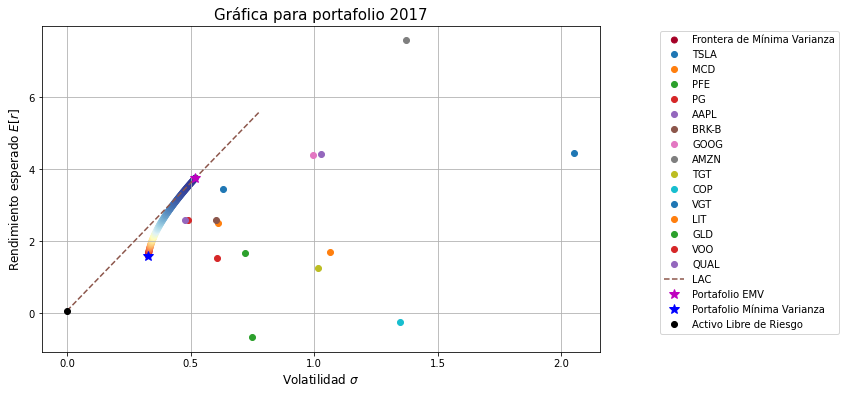

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c=frontera['RS'],
            cmap='RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])


plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2017, E_EMV2017, '*m', ms = 10, label='Portafolio EMV')
plt.plot(s_minvar2017, E_minvar2017, '*b', ms = 10, label='Portafolio Mínima Varianza')
plt.plot(0, rf2017, 'ok', label='Activo Libre de Riesgo')

plt.title('Gráfica para portafolio 2017', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.grid()

plt.savefig('plot2017.png', dpi=300, bbox_inches='tight')

### 2.3 Portafolio 2018

In [ ]:
# 2017
start = '2013-01-01'
end = '2017-12-31'
rf2018 = cetes.iloc[2].loc['tasa']

# Datos
closes = get_adj_closes(tickers = names,
                        start_date = start,
                        end_date = end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data={'Media':252*ret.mean(),
                          'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [ ]:
# Portafolio de mínima varianza
minvar18 = minimize(fun = varianza,
                  x0 = w0,
                  args = (Sigma,),
                  bounds = bnds,
                  constraints = cons,
                  tol = 1e-10)

w_minvar18 = minvar18.x

E_minvar2018 = Eind.T.dot(w_minvar18)
s_minvar2018 = (w_minvar18.T.dot(Sigma).dot(w_minvar18))**0.5
RS_minvar2018 = (E_minvar2018 - rf2018) / s_minvar2018 

In [ ]:
# Portafolio EMV
EMV18 = minimize(fun = menos_RS,
               x0 = w0,
               args = (Eind, Sigma, rf2018),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV18 = EMV18.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2018 = Eind.T.dot(w_EMV18)
s_EMV2018 = (w_EMV18.T.dot(Sigma).dot(w_EMV18))**0.5
RS_EMV2018 = (E_EMV2018 - rf2018) / s_EMV2018

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV18.T.dot(Sigma).dot(w_minvar18)

# Correlación entre los portafolios
corr = cov / (s_EMV2018 * s_minvar2018)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                             'w_minvar': 1 - w,
                             'Media': w * E_EMV2018 + (1 - w) * E_minvar2018,
                             'Vol': ((w * s_EMV2018)**2 + ((1 - w) * s_minvar2018)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2018) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2018 + (1 - wp) * rf2018,
                         'Vol': wp * s_EMV2018})
LAC['RS'] = (LAC['Media'] - rf2018) / LAC['Vol']

### Gráfica 2018

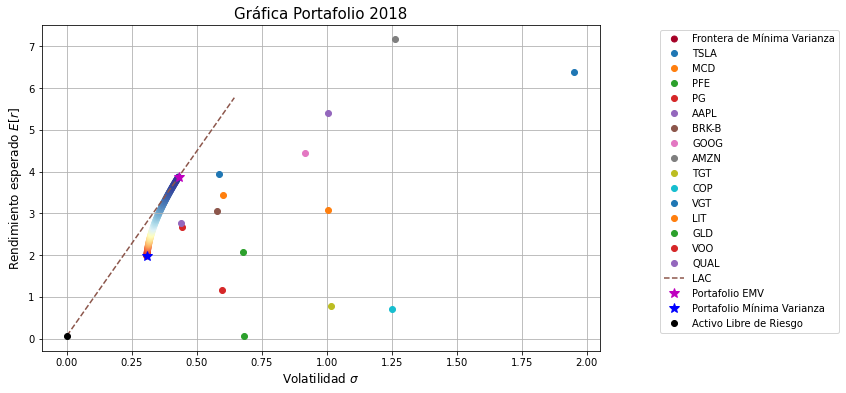

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c=frontera['RS'],
            cmap='RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])


plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2018, E_EMV2018, '*m', ms = 10, label='Portafolio EMV')
plt.plot(s_minvar2018, E_minvar2018, '*b', ms = 10, label='Portafolio Mínima Varianza')
plt.plot(0, rf2018, 'ok', label='Activo Libre de Riesgo')

plt.title('Gráfica Portafolio 2018', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.grid()

plt.savefig('plot2018.png', dpi=300, bbox_inches='tight')

### 2.4 Portafolio 2019

In [ ]:
# 2018
start = '2014-01-01'
end = '2018-12-31'
rf2019 = cetes.iloc[3].loc['tasa']

# Datos
closes = get_adj_closes(tickers=names,start_date=start,end_date=end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data = {'Media':252*ret.mean(),
                            'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [ ]:
# Portafolio de mínima varianza
minvar19 = minimize(fun = varianza,
                  x0 = w0,
                  args = (Sigma,),
                  bounds = bnds,
                  constraints = cons,
                  tol = 1e-10)

w_minvar19 = minvar19.x

E_minvar2019 = Eind.T.dot(w_minvar19)
s_minvar2019 = (w_minvar19.T.dot(Sigma).dot(w_minvar19))**0.5
RS_minvar2019 = (E_minvar2019 - rf2019) / s_minvar2019

In [ ]:
# Portafolio EMV
EMV19 = minimize(fun = menos_RS,
               x0 = w0,
               args =(Eind, Sigma, rf2019),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV19 = EMV19.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2019 = Eind.T.dot(w_EMV19)
s_EMV2019 = (w_EMV19.T.dot(Sigma).dot(w_EMV19))**0.5
RS_EMV2019 = (E_EMV2019 - rf2019) / s_EMV2019

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV19.T.dot(Sigma).dot(w_minvar19)

# Correlación entre los portafolios
corr = cov / (s_EMV2019 * s_minvar2019)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                              'w_minvar': 1 - w,
                              'Media': w * E_EMV2019 + (1 - w) * E_minvar2019,
                              'Vol': ((w * s_EMV2019)**2 + ((1 - w) * s_minvar2019)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2019) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2019 + (1 - wp) * rf2019,
                         'Vol': wp * s_EMV2019})
LAC['RS'] = (LAC['Media'] - rf2019) / LAC['Vol']

### Gráfica 2019

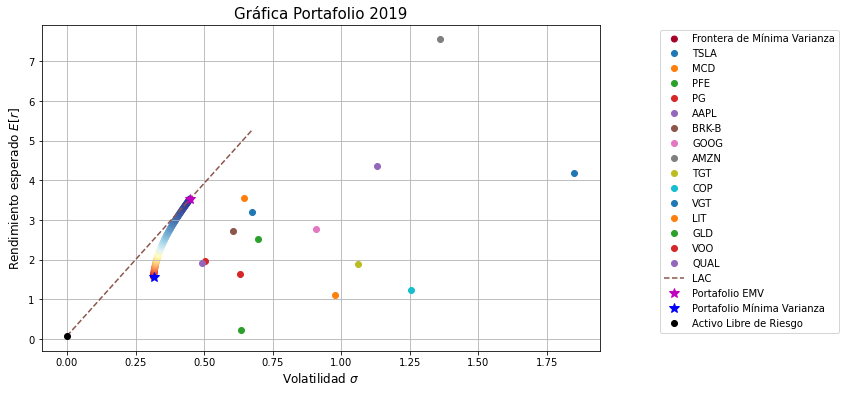

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c = frontera['RS'],
            cmap = 'RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])


plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2019, E_EMV2019, '*m', ms = 10, label='Portafolio EMV')
plt.plot(s_minvar2019, E_minvar2019, '*b', ms = 10, label='Portafolio Mínima Varianza')
plt.plot(0, rf2019, 'ok', label = 'Activo Libre de Riesgo')

plt.title('Gráfica Portafolio 2019', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.1, 1))
plt.grid()

plt.savefig('plot2019.png', dpi=300, bbox_inches='tight')

### 2.5 Portafolio 2020

In [ ]:
# 2019
start = '2015-01-01'
end = '2019-12-31'
rf2020 = cetes.iloc[4].loc['tasa']

# Datos
closes = get_adj_closes(tickers=names,start_date=start,end_date=end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data={'Media':252*ret.mean(),
                          'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [ ]:
# Portafolio de mínima varianza
minvar20 = minimize(fun = varianza,
                  x0 = w0,
                  args =(Sigma,),
                  bounds = bnds,
                  constraints = cons,
                  tol = 1e-10)

w_minvar20 = minvar20.x

E_minvar2020 = Eind.T.dot(w_minvar20)
s_minvar2020 = (w_minvar20.T.dot(Sigma).dot(w_minvar20))**0.5
RS_minvar2020 = (E_minvar2020 - rf2020) / s_minvar2020

In [ ]:
# Portafolio EMV
EMV20 = minimize(fun = menos_RS,
               x0 = w0,
               args = (Eind, Sigma, rf2020),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV20 = EMV20.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2020 = Eind.T.dot(w_EMV20)
s_EMV2020 = (w_EMV20.T.dot(Sigma).dot(w_EMV20))**0.5
RS_EMV2020 = (E_EMV2020 - rf2020) / s_EMV2020

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV20.T.dot(Sigma).dot(w_minvar20)

# Correlación entre los portafolios
corr = cov / (s_EMV2020 * s_minvar2020)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                              'w_minvar': 1 - w,
                              'Media': w * E_EMV2020 + (1 - w) * E_minvar2020,
                              'Vol': ((w * s_EMV2020)**2 + ((1 - w) * s_minvar2020)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2020) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2020 + (1 - wp) * rf2020,
                         'Vol': wp * s_EMV2020})
LAC['RS'] = (LAC['Media'] - rf2020) / LAC['Vol']

### Gráfica 2020

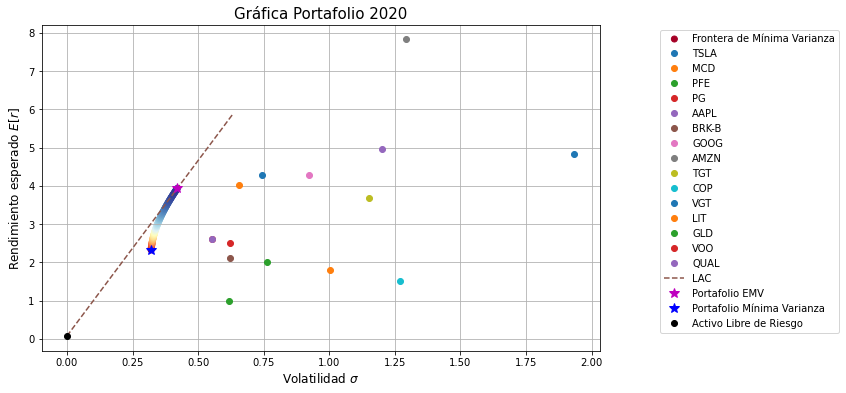

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c=frontera['RS'],
            cmap='RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])


plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2020, E_EMV2020, '*m', ms = 10, label='Portafolio EMV')
plt.plot(s_minvar2020, E_minvar2020, '*b', ms = 10, label='Portafolio Mínima Varianza')
plt.plot(0, rf2020, 'ok', label='Activo Libre de Riesgo')

plt.title('Gráfica Portafolio 2020', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.grid()

plt.savefig('plot2020.png', dpi=300, bbox_inches='tight')

### 2.6 Portafolio 2021

In [ ]:
# 2020
start = '2016-01-01'
end = '2020-12-31'
rf2021 = cetes.iloc[5].loc['tasa']

# Datos
closes = get_adj_closes(tickers=names,start_date=start,end_date=end)
ret = closes.pct_change().dropna()

# Rendimiento y volatilidad
summ = pd.DataFrame(data={'Media':252*ret.mean(),
                          'Vol':((252)**(0.5))*ret.std()})

# Matriz de covarianza
cov = ret.cov()

# Matriz de correlación
corr = ret.corr()

S = np.diag(summ['Vol'].values)
Sigma = S.dot(corr).dot(S) 
Eind = summ['Media'].values

# Número de activos
n = len(Eind)
# Dato inicial
w0 = np.ones((n,)) / n
# Cotas de las variables
bnds = ((0,1),) * n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [ ]:
# Portafolio de mínima varianza
minvar21 = minimize(fun = varianza,
                  x0 = w0,
                  args =(Sigma,),
                  bounds = bnds,
                  constraints = cons,
                  tol = 1e-10)

w_minvar21 = minvar21.x

E_minvar2021 = Eind.T.dot(w_minvar21)
s_minvar2021 = (w_minvar21.T.dot(Sigma).dot(w_minvar21))**0.5
RS_minvar2021 = (E_minvar2021 - rf2021) / s_minvar2021

In [ ]:
# Portafolio EMV
EMV21 = minimize(fun = menos_RS,
               x0 = w0,
               args = (Eind, Sigma, rf2021),
               bounds = bnds,
               constraints = cons,
               tol = 1e-10)

w_EMV21 = EMV21.x

# Rendimiento, riesgo y Radio de Sharpe 
E_EMV2021 = Eind.T.dot(w_EMV21)
s_EMV2021 = (w_EMV21.T.dot(Sigma).dot(w_EMV21))**0.5
RS_EMV2021 = (E_EMV2021 - rf2021) / s_EMV2021

In [ ]:
# Covarianza entre los portafolios
cov = w_EMV21.T.dot(Sigma).dot(w_minvar21)

# Correlación entre los portafolios
corr = cov / (s_EMV2021 * s_minvar2021)

In [ ]:
# Frontera
N = 101
w = np.linspace(0,1, N)

frontera = pd.DataFrame(data={'w_EMV': w,
                              'w_minvar': 1 - w,
                              'Media': w * E_EMV2021 + (1 - w) * E_minvar2021,
                              'Vol': ((w * s_EMV2021)**2 + ((1 - w) * s_minvar2021)**2 + 2 * w * (1 - w) * cov)**0.5})
frontera['RS'] = (frontera['Media'] - rf2021) / frontera['Vol']

# LAC
wp = np.linspace(0,1.5)
LAC = pd.DataFrame(data={'wp': wp,
                         'wf': 1 - wp,
                         'Media': wp * E_EMV2021 + (1 - wp) * rf2021,
                         'Vol': wp * s_EMV2021})
LAC['RS'] = (LAC['Media'] - rf2021) / LAC['Vol']

### Gráfica 2021

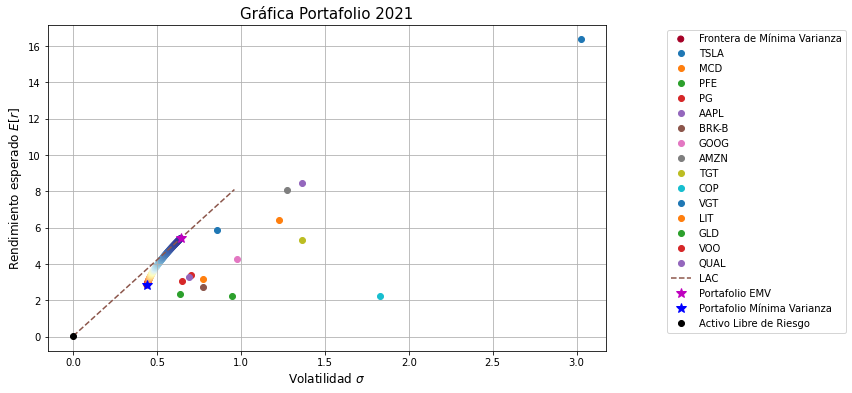

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(frontera['Vol'],
            frontera['Media'],
            c=frontera['RS'],
            cmap='RdYlBu',
            label = 'Frontera de Mínima Varianza')

for i in range(n):
    plt.plot(summ.iloc[i,1], summ.iloc[i,0], 'o', label = summ.index[i])


plt.plot(LAC['Vol'], LAC['Media'], '--', label='LAC')
plt.plot(s_EMV2021, E_EMV2021, '*m', ms = 10, label='Portafolio EMV')
plt.plot(s_minvar2021, E_minvar2021, '*b', ms = 10, label='Portafolio Mínima Varianza')
plt.plot(0, rf2021, 'ok', label='Activo Libre de Riesgo')

plt.title('Gráfica Portafolio 2021', size = 15)
plt.xlabel('Volatilidad $\sigma$', size = 12)
plt.ylabel('Rendimiento esperado $E[r]$', size = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.grid()

plt.savefig('plot2021.png', dpi=300, bbox_inches='tight')

## Tabla Resumen

In [ ]:
visual = pd.DataFrame(index = ['2016', '2017', '2018', '2019', '2020', '2021'],
                      columns = ['Tasa RF', 'Media MinVar', 'Vol MinVar', 'RS MinVar', 'Media EMV', 'Vol EMV', 'RS EMV'])
visual['Tasa RF'] = [rf2016, rf2017, rf2018, rf2019, rf2020, rf2021 ]
visual['Media MinVar'] = [E_minvar2016, E_minvar2017, E_minvar2018, E_minvar2019, E_minvar2020, E_minvar2021]
visual['Vol MinVar'] = [s_minvar2016, s_minvar2017, s_minvar2018, s_minvar2019, s_minvar2020, s_minvar2021]
visual['RS MinVar'] = [RS_minvar2016, RS_minvar2017, RS_minvar2018, RS_minvar2019, RS_minvar2020, RS_minvar2021]
visual['Media EMV'] = [E_EMV2016, E_EMV2017, E_EMV2018, E_EMV2019, E_EMV2020, E_EMV2021]
visual['Vol EMV'] = [s_EMV2016, s_EMV2017, s_EMV2018, s_EMV2019, s_EMV2020, s_EMV2021]
visual['RS EMV'] = [RS_EMV2016, RS_EMV2017, RS_EMV2018, RS_EMV2019, RS_EMV2020, RS_EMV2021]

visual = visual.round(4)
visual

,Tasa RF,Media MinVar,Vol MinVar,RS MinVar,Media EMV,Vol EMV,RS EMV
2016,0.0305,0.9254,0.3256,2.7485,3.7857,0.4915,7.6397
2017,0.0582,1.5938,0.3287,4.6713,3.7516,0.5196,7.1089
2018,0.0725,1.9784,0.3072,6.2033,3.8686,0.4293,8.8423
2019,0.0806,1.5722,0.3158,4.7224,3.5335,0.4491,7.6891
2020,0.0725,2.3236,0.3209,7.0151,3.9323,0.4206,9.1771
2021,0.0428,2.8475,0.4389,6.3904,5.4171,0.6402,8.3944


In [ ]:
# Combinación óptima
wport2016 = (E_EMV2016 - rf2016) / (g * (s_EMV2016)**2)
wport2017 = (E_EMV2017 - rf2017) / (g * (s_EMV2017)**2)
wport2018 = (E_EMV2018 - rf2018) / (g * (s_EMV2018)**2)
wport2019 = (E_EMV2019 - rf2019) / (g * (s_EMV2019)**2)
wport2020 = (E_EMV2020 - rf2020) / (g * (s_EMV2020)**2)
wport2021 = (E_EMV2021 - rf2021) / (g * (s_EMV2021)**2)

### Asignación de capital

* **Portafolio de Mínima Varianza**

In [ ]:
ponderaciones_MV = pd.DataFrame(index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'], 
                        columns = ['2016', '2017', '2018', '2019', '2020', '2021'])
ponderaciones_MV.index.name = 'Activo'

ponderaciones_MV['2016'] = np.round(w_minvar16, decimals = 4)
ponderaciones_MV['2017'] = np.round(w_minvar17, decimals = 4)
ponderaciones_MV['2018'] = np.round(w_minvar18, decimals = 4)
ponderaciones_MV['2019'] = np.round(w_minvar19, decimals = 4)
ponderaciones_MV['2020'] = np.round(w_minvar20, decimals = 4)
ponderaciones_MV['2021'] = np.round(w_minvar21, decimals = 4)

ponderaciones_MV

,2016,2017,2018,2019,2020,2021
Activo,,,,,,
TSLA,0.0170,0.0042,0.0145,0.0000,0.0082,0.0000
MCD,0.1483,0.1504,0.1151,0.1263,0.1330,0.1046
PFE,0.0000,0.0000,0.0000,0.0240,0.1348,0.0718
PG,0.0492,0.0994,0.1047,0.1782,0.1421,0.2051
AAPL,0.0000,0.0000,0.0000,0.0000,0.0012,0.0000
BRK-B,0.1626,0.1369,0.1206,0.0000,0.0292,0.1064
GOOG,0.0645,0.0858,0.0753,0.0520,0.1056,0.0894
AMZN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
TGT,0.0672,0.0350,0.0407,0.0606,0.0503,0.0175


* **Portafolio Eficiente en Media Varianza**

In [ ]:
ponderaciones_EMV = pd.DataFrame(index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'], 
                        columns = ['2016', '2017', '2018', '2019', '2020', '2021'])
ponderaciones_EMV.index.name = 'Activo'

ponderaciones_EMV['2016'] = np.round(w_EMV16, decimals = 4)
ponderaciones_EMV['2017'] = np.round(w_EMV17 , decimals = 4)
ponderaciones_EMV['2018'] = np.round(w_EMV18 , decimals = 4)
ponderaciones_EMV['2019'] = np.round(w_EMV19 , decimals = 4)
ponderaciones_EMV['2020'] = np.round(w_EMV20 , decimals = 4)
ponderaciones_EMV['2021'] = np.round(w_EMV21 , decimals = 4)

ponderaciones_EMV

,2016,2017,2018,2019,2020,2021
Activo,,,,,,
TSLA,0.0770,0.0584,0.0767,0.0247,0.0448,0.0364
MCD,0.3837,0.1364,0.2077,0.3275,0.2861,0.0000
PFE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PG,0.0000,0.0000,0.0000,0.1208,0.1974,0.2783
AAPL,0.1447,0.1043,0.1067,0.0860,0.0271,0.0808
BRK-B,0.0000,0.3570,0.3217,0.1163,0.0000,0.0000
GOOG,0.2580,0.1345,0.1136,0.0000,0.0000,0.0000
AMZN,0.0000,0.1585,0.0833,0.1673,0.1732,0.2239
TGT,0.1365,0.0071,0.0000,0.0464,0.1164,0.1117


* **Pesos al portafolio riesgoso y al activo libre de riesgo**

In [ ]:
pesos = pd.DataFrame(columns = ['Portafolio', 'Activo RF'],
                     index = ['2016', '2017', '2018', '2019', '2020', '2021'])
pesos.index.name = 'Año'
pesos['Portafolio'] = [wport2016, wport2017, wport2018, wport2019, wport2020, wport2021]
pesos['Activo RF'] = [1-wport2016, 1-wport2017, 1-wport2018, 1-wport2019, 1-wport2020, 1-wport2021]

pesos

,Portafolio,Activo RF
Año,,
2016,2.220377,-1.220377
2017,1.954674,-0.954674
2018,2.942392,-1.942392
2019,2.446043,-1.446043
2020,3.117084,-2.117084
2021,1.873124,-0.873124


* **Ponderaciones para cada activo del portafolio**

In [ ]:
pond_port = pd.DataFrame(index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'], 
                        columns = ['2016', '2017', '2018', '2019', '2020', '2021'])
pond_port['2016'] = np.round((wport2016 * w_EMV16), decimals = 4)
pond_port['2017'] = np.round((wport2017 * w_EMV17), decimals = 4)
pond_port['2018'] = np.round((wport2018 * w_EMV18), decimals = 4)
pond_port['2019'] = np.round((wport2019 * w_EMV19), decimals = 4)
pond_port['2020'] = np.round((wport2020 * w_EMV20), decimals = 4)
pond_port['2021'] = np.round((wport2021 * w_EMV21), decimals = 4)

pond_port

,2016,2017,2018,2019,2020,2021
TSLA,0.1711,0.1141,0.2257,0.0605,0.1398,0.0682
MCD,0.8520,0.2667,0.6112,0.8010,0.8918,0.0000
PFE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PG,0.0000,0.0000,0.0000,0.2955,0.6153,0.5212
AAPL,0.3213,0.2038,0.3141,0.2104,0.0843,0.1514
BRK-B,0.0000,0.6978,0.9466,0.2844,0.0000,0.0000
GOOG,0.5729,0.2628,0.3344,0.0000,0.0000,0.0000
AMZN,0.0000,0.3098,0.2451,0.4092,0.5398,0.4194
TGT,0.3031,0.0139,0.0000,0.1135,0.3627,0.2093
COP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## 3. Evaluación del rendimiento

3.1 Rendimiento del portafolio 1 (2016)

In [ ]:
start = '2016-01-01'
end = '2021-05-12'
closes = get_adj_closes(tickers=names,start_date=start,end_date=end)

In [ ]:
r1 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r1.index.name = '2016'
r1['Precio Inicial'] = np.array(closes.loc['2016-01-01'])
r1['Precio Final'] = np.array(closes.loc['2016-12-01'])
r1['Rendimiento'] = (r1['Precio Final'] - r1['Precio Inicial']) / r1['Precio Inicial']
r1['Ponderación'] = np.array(pond_port['2016'])
r1

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2016,,,,
TSLA,38.240002,42.737999,0.117625,0.1711
MCD,105.743896,107.189247,0.013668,0.8520
PFE,22.884596,25.300165,0.105554,0.0000
PG,68.224731,72.528351,0.063080,0.0000
AAPL,22.473866,27.335484,0.216323,0.3213
BRK-B,129.770004,162.979996,0.255914,0.0000
GOOG,742.950012,771.820007,0.038859,0.5729
AMZN,587.000000,749.869995,0.277462,0.0000
TGT,60.735165,62.562031,0.030079,0.3031


In [ ]:
r2 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r2.index.name = '2017'
r2['Precio Inicial'] = np.array(closes.loc['2017-01-01'])
r2['Precio Final'] = np.array(closes.loc['2017-12-01'])
r2['Rendimiento'] = (r2['Precio Final'] - r2['Precio Inicial']) / r2['Precio Inicial']
r2['Ponderación'] = np.array(pond_port['2017'])
r2

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2017,,,,
TSLA,50.386002,62.270000,0.235859,0.1141
MCD,107.937805,155.478333,0.440444,0.2667
PFE,24.715954,29.323353,0.186414,0.0000
PG,75.564728,81.736023,0.081669,0.0000
AAPL,28.640661,40.583443,0.416987,0.2038
BRK-B,164.139999,198.220001,0.207628,0.6978
GOOG,796.789978,1046.400024,0.313270,0.2628
AMZN,823.479980,1169.469971,0.420156,0.3098
TGT,55.849377,58.911240,0.054824,0.0139


In [ ]:
r3 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r3.index.name = '2018'
r3['Precio Inicial'] = np.array(closes.loc['2018-01-01'])
r3['Precio Final'] = np.array(closes.loc['2018-12-01'])
r3['Rendimiento'] = (r3['Precio Final'] - r3['Precio Inicial']) / r3['Precio Inicial']
r3['Ponderación'] = np.array(pond_port['2018'])
r3

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2018,,,,
TSLA,70.862000,66.559998,-0.060710,0.2257
MCD,154.593109,164.463577,0.063848,0.6112
PFE,29.987211,36.601086,0.220557,0.0000
PG,76.807648,84.653610,0.102151,0.0000
AAPL,40.151787,38.395920,-0.043731,0.3141
BRK-B,214.380005,204.179993,-0.047579,0.9466
GOOG,1169.939941,1035.609985,-0.114818,0.3344
AMZN,1450.890015,1501.969971,0.035206,0.2451
TGT,67.912697,61.662712,-0.092030,0.0000


In [ ]:
r4 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r4.index.name = '2019'
r4['Precio Inicial'] = np.array(closes.loc['2019-01-01'])
r4['Precio Final'] = np.array(closes.loc['2019-12-01'])
r4['Rendimiento'] = (r4['Precio Final'] - r4['Precio Inicial']) / r4['Precio Inicial']
r4['Ponderación'] = np.array(pond_port['2019'])
r4

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2019,,,,
TSLA,61.403999,83.666000,0.362550,0.0605
MCD,165.584274,187.441574,0.132001,0.8010
PFE,35.594879,34.072731,-0.042763,0.0000
PG,88.843918,118.261475,0.331115,0.2955
AAPL,40.513611,72.552094,0.790808,0.2104
BRK-B,205.539993,226.500000,0.101975,0.2844
GOOG,1116.369995,1337.020020,0.197650,0.0000
AMZN,1718.729980,1847.839966,0.075119,0.4092
TGT,68.109825,123.431969,0.812249,0.1135


In [ ]:
r5 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r5.index.name = '2020'
r5['Precio Inicial'] = np.array(closes.loc['2020-01-01'])
r5['Precio Final'] = np.array(closes.loc['2020-12-01'])
r5['Rendimiento'] = (r5['Precio Final'] - r5['Precio Inicial']) / r5['Precio Inicial']
r5['Ponderación'] = np.array(pond_port['2020'])
r5

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2020,,,,
TSLA,130.113998,705.669983,4.423475,0.1398
MCD,202.959747,208.616455,0.027871,0.8918
PFE,32.385616,35.156666,0.085564,0.0000
PG,117.996353,134.997864,0.144085,0.6153
AAPL,76.470634,132.267349,0.729649,0.0843
BRK-B,224.429993,231.869995,0.033151,0.0000
GOOG,1434.229980,1751.880005,0.221478,0.0000
AMZN,2008.719971,3256.929932,0.621396,0.5398
TGT,106.613022,173.387360,0.626324,0.3627


In [ ]:
r6 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r6.index.name = '2021'
r6['Precio Inicial'] = np.array(closes.loc['2021-01-01'])
r6['Precio Final'] = np.array(closes.loc['2021-05-01'])
r6['Rendimiento'] = (r6['Precio Final'] - r6['Precio Inicial']) / r6['Precio Inicial']
r6['Ponderación'] = np.array(pond_port['2021'])
r6

,Precio Inicial,Precio Final,Rendimiento,Ponderación
2021,,,,
TSLA,793.530029,571.690002,-0.279561,0.0682
MCD,202.063751,224.758728,0.112316,0.0000
PFE,34.287537,38.715527,0.129143,0.0000
PG,124.393250,135.285965,0.087567,0.5212
AAPL,131.539673,124.758087,-0.051555,0.1514
BRK-B,227.869995,286.899994,0.259051,0.0000
GOOG,1835.739990,2261.969971,0.232184,0.0000
AMZN,3206.199951,3161.469971,-0.013951,0.4194
TGT,177.944763,205.626724,0.155565,0.2093


In [ ]:
ren2016 = (r1['Rendimiento'] * r1['Ponderación']).sum()
ren2017 = (r2['Rendimiento'] * r2['Ponderación']).sum()
ren2018 = (r3['Rendimiento'] * r3['Ponderación']).sum()
ren2019 = (r4['Rendimiento'] * r4['Ponderación']).sum()
ren2020 = (r5['Rendimiento'] * r5['Ponderación']).sum()
ren2021 = (r6['Rendimiento'] * r6['Ponderación']).sum()

In [ ]:
rend_port = pd.DataFrame(columns = ['Rendimiento'],
                          index = ['P2016', 'P2017', 'P2018', 'P2019', 'P2020', 'P2021'])
rend_port['Rendimiento'] = [ren2016, ren2017, ren2018, ren2019, ren2020, ren2021]


rend_port

,Rendimiento
P2016,0.132655
P2017,0.593511
P2018,-0.076530
P2019,0.583329
P2020,1.449974
P2021,0.031524


### 3.7 Rendimiento total 2016-2021

In [ ]:
rend_total = (rend_port['Rendimiento'] + 1).prod()-1
rend_total

5.669410266794487

### 3.8 Rendimiento promedio anual 2016-2021

In [ ]:
rend_anual = (((rend_port['Rendimiento']+1).prod()))**(1/6)-1
rend_anual

0.3719803952715819

### 3.9 Inversión 

In [ ]:
r1 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r1.index.name = '2016'
r1['Precio Inicial'] = np.array(closes.loc['2016-01-01'])
r1['Precio Final'] = np.array(closes.loc['2016-12-01'])
r1['Rendimiento'] = (r1['Precio Final'] - r1['Precio Inicial']) / r1['Precio Inicial']
r1['Ponderación'] = np.array(w_EMV16)

In [ ]:
r2 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r2.index.name = '2017'
r2['Precio Inicial'] = np.array(closes.loc['2017-01-01'])
r2['Precio Final'] = np.array(closes.loc['2017-12-01'])
r2['Rendimiento'] = (r2['Precio Final'] - r2['Precio Inicial']) / r2['Precio Inicial']
r2['Ponderación'] = np.array(w_EMV17)

In [ ]:
r3 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
               index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r3.index.name = '2018'
r3['Precio Inicial'] = np.array(closes.loc['2018-01-01'])
r3['Precio Final'] = np.array(closes.loc['2018-12-01'])
r3['Rendimiento'] = (r3['Precio Final'] - r3['Precio Inicial']) / r3['Precio Inicial']
r3['Ponderación'] = np.array(w_EMV18)

In [ ]:
r4 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r4.index.name = '2019'
r4['Precio Inicial'] = np.array(closes.loc['2019-01-01'])
r4['Precio Final'] = np.array(closes.loc['2019-12-01'])
r4['Rendimiento'] = (r4['Precio Final'] - r4['Precio Inicial']) / r4['Precio Inicial']
r4['Ponderación'] = np.array(w_EMV19)

In [ ]:
r5 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r5.index.name = '2020'
r5['Precio Inicial'] = np.array(closes.loc['2020-01-01'])
r5['Precio Final'] = np.array(closes.loc['2020-12-01'])
r5['Rendimiento'] = (r5['Precio Final'] - r5['Precio Inicial']) / r5['Precio Inicial']
r5['Ponderación'] = np.array(w_EMV20)

In [ ]:
r6 = pd.DataFrame(columns = ['Precio Inicial', 'Precio Final', 'Rendimiento'],
                 index = ['TSLA','MCD','PFE','PG','AAPL','BRK-B','GOOG','AMZN','TGT','COP',
         'VGT','LIT','GLD','VOO','QUAL'])
r6.index.name = '2021'
r6['Precio Inicial'] = np.array(closes.loc['2021-01-01'])
r6['Precio Final'] = np.array(closes.loc['2021-05-01'])
r6['Rendimiento'] = (r6['Precio Final'] - r6['Precio Inicial']) / r6['Precio Inicial']
r6['Ponderación'] = np.array(w_EMV21)

In [ ]:
ren2016 = (r1['Rendimiento'] * r1['Ponderación']).sum()
ren2017 = (r2['Rendimiento'] * r2['Ponderación']).sum()
ren2018 = (r3['Rendimiento'] * r3['Ponderación']).sum()
ren2019 = (r4['Rendimiento'] * r4['Ponderación']).sum()
ren2020 = (r5['Rendimiento'] * r5['Ponderación']).sum()
ren2021 = (r6['Rendimiento'] * r6['Ponderación']).sum()

In [ ]:
rend_port = pd.DataFrame(columns = ['Rendimiento'],
                          index = ['P2016', 'P2017', 'P2018', 'P2019', 'P2020', 'P2021'])
rend_port['Rendimiento'] = [ren2016, ren2017, ren2018, ren2019, ren2020, ren2021]


rend_port

,Rendimiento
P2016,0.059745
P2017,0.303635
P2018,-0.026007
P2019,0.238472
P2020,0.465174
P2021,0.016823


In [ ]:
inv_inicial = 10000

inv = pd.DataFrame(index = ['2016', '2017', '2018', '2019', '2020', '2021'],
                   columns = ['Saldo Inicial', 'Ren Anual', 'G/P', 'Total'])

inv['Ren Anual'] = np.array(rend_port.values)

inv.loc['2016','Total'] = inv_inicial * (1 + inv.loc['2016','Ren Anual'])
inv.loc['2016', 'Saldo Inicial'] = inv_inicial

inv.loc['2017', 'Saldo Inicial'] = inv.iloc[0,3]
inv.iloc[1,3] = inv.iloc[0,3] * (1 + inv.loc['2017', 'Ren Anual'])

inv.loc['2018', 'Saldo Inicial'] = inv.iloc[1,3]
inv.iloc[2,3] = inv.iloc[1,3] * (1 + inv.loc['2018', 'Ren Anual'])

inv.loc['2019', 'Saldo Inicial'] = inv.iloc[2,3]
inv.iloc[3,3] = inv.iloc[2,3] * (1 + inv.loc['2019', 'Ren Anual'])

inv.loc['2020', 'Saldo Inicial'] = inv.iloc[3,3]
inv.iloc[4,3] = inv.iloc[3,3] * (1 + inv.loc['2020', 'Ren Anual'])

inv.loc['2021', 'Saldo Inicial'] = inv.iloc[4,3]
inv.iloc[5,3] = inv.iloc[4,3] * (1 + inv.loc['2021', 'Ren Anual'])

inv['G/P'] = inv['Total'] - inv['Saldo Inicial']
inv

,Saldo Inicial,Ren Anual,G/P,Total
2016,10000,0.059745,597.452972,10597.452972
2017,10597.452972,0.303635,3217.757007,13815.209979
2018,13815.209979,-0.026007,-359.296068,13455.913911
2019,13455.913911,0.238472,3208.857476,16664.771387
2020,16664.771387,0.465174,7752.021294,24416.792681
2021,24416.792681,0.016823,410.75787,24827.550551


In [ ]:
inicial = inv['Saldo Inicial'].iloc[0]
final  = inv['Total'].iloc[5]
inicial, final

(10000, 24827.550551016033)

In [ ]:
rendimiento_actual= (final-inicial)/inicial*100
rendimiento_actual

148.27550551016034

In [ ]:
r_anual=rendimiento_actual/5
r_anual

29.65510110203207

## Conclusión:
---
> Tras haber analizado los resultados obtenidos con este portafolio, concluímos que realmente es un portafolio eficiente, con un rendimiento considerable, ya que a pesar de que en 2018 se obtuve una pérdida de -2.06%, esta cantidad fue mínima considerando el rendimiento obtenido en los años restantes. En total se obtuvo un rendimiento de 166.5% lo cual nos indica que nuestra inversión se duplicó, lo cual nos da la oportunidad de ofrecer una tasa atractiva a un posible cliente y aún así nosotros obtener un beneficio por el manejo de este portafolio.

<img style = "float: middle" src = "https://memegenerator.net/img/instances/85518739.jpg" width = "400" >
